In [2]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import plotly.graph_objects as go
from scipy.ndimage import zoom


In [13]:
import tarfile

def check_tarfile_integrity(file_path):
    try:
        with tarfile.open(file_path, 'r') as tar:
            for member in tar.getmembers():
                tar.extractfile(member)  # Try to extract each file
        print("The tar file is not corrupted.")
    except Exception as e:
        print(f"Error: {e}")
        print("The tar file is corrupted.")

# Replace 'filename.tar' with your tar file path
check_tarfile_integrity('/home/groups/yzwang/gabriel_files/ena_18july_20231221_173113.tar')

Error: unexpected end of data
The tar file is corrupted.


### Visualization of **Fields** files parameters

In [3]:
def print_info(name, obj):
    if isinstance(obj, h5py.Group):
        print(f"'{name}' : Group")
    elif isinstance(obj, h5py.Dataset):
        print(f"'{name}' : Dataset")
    else:
        print(f"'{name}' : unknown type")

In [4]:
file_path = '/home/groups/yzwang/gabriel_files/PNNLData/ENA_Jul_18/00d-01h-00m-00s-000ms.h5'
with h5py.File(file_path, 'r') as f:
    f.visititems(print_info)

'CE_rate' : Dataset
'CldNucl_rate' : Dataset
'EFFR' : Dataset
'LH_rate' : Dataset
'MA' : Dataset
'Q_criterion' : Dataset
'T' : Dataset
'T_sbm_in' : Dataset
'X' : Dataset
'Y' : Dataset
'Z' : Dataset
'accr_cldmsink_b' : Dataset
'accr_cldnsink_b' : Dataset
'alpha' : Dataset
'auto_cldmsink_b' : Dataset
'auto_cldnsink_b' : Dataset
'buoyancy' : Dataset
'buoyancy_gradient_mag' : Dataset
'bvf' : Dataset
'c_RV' : Dataset
'dTdt_rad' : Dataset
'difful_tend' : Dataset
'diffur_tend' : Dataset
'dynamic pressure' : Dataset
'eddy_diffusivity' : Dataset
'eddy_viscosity' : Dataset
'ff1i0_bfcc' : Dataset
'ff1i1' : Dataset
'ff1i10' : Dataset
'ff1i10_bfcc' : Dataset
'ff1i11' : Dataset
'ff1i11_bfcc' : Dataset
'ff1i12' : Dataset
'ff1i12_bfcc' : Dataset
'ff1i13' : Dataset
'ff1i13_bfcc' : Dataset
'ff1i14' : Dataset
'ff1i14_bfcc' : Dataset
'ff1i15' : Dataset
'ff1i15_bfcc' : Dataset
'ff1i16' : Dataset
'ff1i16_bfcc' : Dataset
'ff1i17' : Dataset
'ff1i17_bfcc' : Dataset
'ff1i18' : Dataset
'ff1i18_bfcc' : Dataset
'f

In [5]:
def load_dataset(dataset_name):
    dataset = f[dataset_name]
    print(dataset_name)
    print(f"Shape: {dataset.shape}")

    for attr in dataset.attrs:
        print(f"Attribute: {attr} = {dataset.attrs[attr]}\n")
    
    return dataset[:]


In [6]:
with h5py.File(file_path, 'r') as f:
    #"cloud droplet mixing ratio immediately before evaluation of collision-coalescence in SBM [kg kg-1]"
    
    qc_autoconv_data = load_dataset('qc_autoconv')

    # cloud droplet number concentration immediately before evaluation of collision-coalescence in SBM [# kg-1]
    nc_autoconv_data = load_dataset('nc_autoconv')
    

qc_autoconv
Shape: (1, 512, 512, 250)
Attribute: DIMENSION_LIST = [array([<HDF5 object reference>], dtype=object)
 array([<HDF5 object reference>], dtype=object)
 array([<HDF5 object reference>], dtype=object)
 array([<HDF5 object reference>], dtype=object)]

Attribute: long_name = cloud water autoconversion mass

Attribute: standard_name = None

Attribute: units = kg kg^-1

nc_autoconv
Shape: (1, 512, 512, 250)
Attribute: DIMENSION_LIST = [array([<HDF5 object reference>], dtype=object)
 array([<HDF5 object reference>], dtype=object)
 array([<HDF5 object reference>], dtype=object)
 array([<HDF5 object reference>], dtype=object)]

Attribute: long_name = cloud water autoconversion number

Attribute: standard_name = None

Attribute: units = kg^-1



In [7]:
with h5py.File(file_path, 'r') as f:
    qr_autoconv_data = load_dataset('qr_autoconv')

qr_autoconv
Shape: (1, 512, 512, 250)
Attribute: DIMENSION_LIST = [array([<HDF5 object reference>], dtype=object)
 array([<HDF5 object reference>], dtype=object)
 array([<HDF5 object reference>], dtype=object)
 array([<HDF5 object reference>], dtype=object)]

Attribute: long_name = rain water autoconversion mass

Attribute: standard_name = None

Attribute: units = kg kg^-1



In [8]:
qc_autoconv_data = np.squeeze(qc_autoconv_data)
qc_autoconv_data = -np.log(qc_autoconv_data, where = qc_autoconv_data > 0)
nc_autoconv_data = np.squeeze(nc_autoconv_data)
qr_autoconv_data = np.squeeze(qr_autoconv_data)
qr_autoconv_data = -np.log(qr_autoconv_data, where = qr_autoconv_data > 0)

In [9]:
def plot_slice(data, level, label):
    plt.figure(figsize=(8, 6))
    plt.imshow(data[:, :, level], cmap='viridis')
    plt.colorbar(label = label)
    plt.title(f'2D Slice at Vertical Level {level}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.gca().invert_yaxis()
    plt.show()

In [10]:
def volume_render_plot(dataset):
    data = zoom(dataset, (0.25, 0.25, 0.25))
    x, y, z = np.indices(data.shape)
    x = x.flatten()
    y = y.flatten()
    z = z.flatten()
    values = data.flatten()

    fig = go.Figure(data=go.Volume(
        x=x,
        y=y,
        z=z,
        value=values,
        isomin=np.min(values),
        isomax=np.max(values),
        opacity=0.2,  # Adjust for better visualization
        surface_count=15,  # Number of isosurfaces
        colorscale='Viridis'  # Color scale
    ))

    fig.update_layout(scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ))

    fig.show()

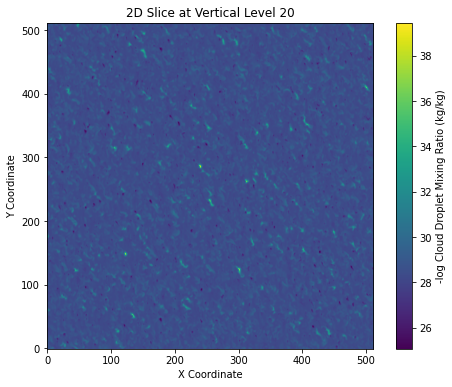

In [11]:
plot_slice(qc_autoconv_data, 20, '-log Cloud Droplet Mixing Ratio (kg/kg)')

In [12]:
volume_render_plot(qc_autoconv_data)

KeyboardInterrupt: 

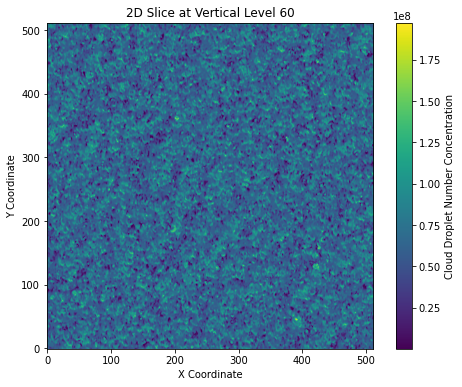

In [ ]:
plot_slice(nc_autoconv_data, 60, 'Cloud Droplet Number Concentration')

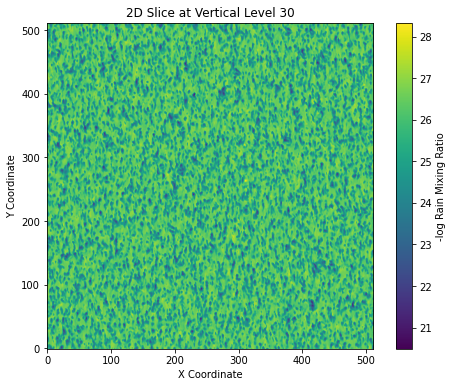

In [ ]:
plot_slice(qr_autoconv_data, 30, '-log Rain Mixing Ratio')